In [1]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt #Matplotlib是RGB
%matplotlib inline 

def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plt_show(name, image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 获取图像的原始尺寸
    height, width, _ = img_rgb.shape
    # 设置图像的显示尺寸（以像素为单位）
    dpi = 100  # 图像的分辨率（点每英寸）
    figsize = width / float(dpi), height / float(dpi)
    # 创建一个具有指定尺寸的图形
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    title = name
    plt.title(title)
    # 清除坐标轴刻度
    plt.xticks([]) 
    plt.yticks([]) 
    plt.xlabel(f'figsize:{figsize}inch', fontsize=12, labelpad=15)
    plt.show()

### 腐蚀操作：cv2.erode()

cv2.erode() 函数是 OpenCV 库中的一个函数，用于对图像进行腐蚀操作。</br>腐蚀是一种形态学操作，它通过使用一个结构元素（也称为核）来侵蚀图像中的前景对象（通常是白色区域）。</br>腐蚀操作可以用来缩小前景对象的大小，消除小对象，或者将对象连接的部分断开。

##### dst = cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

参数：</br>
- src：输入图像，可以是灰度图像或者二值图像。
- kernel：腐蚀操作的核，可以是由 cv2.getStructuringElement() 生成的结构元素，或者直接定义的核数组。
- dst：输出图像，可以省略，如果不指定，函数会自动创建一个与 src 相同大小和类型的目标图像。
- anchor：锚点位置，默认值是 (-1, -1)，表示锚点位于核的中心。
- iterations：腐蚀操作的迭代次数，默认值为 1。如果设置为更大的数值，腐蚀操作会被重复执行多次。
- borderType：边界类型，用于处理边界扩展，默认值是 cv2.BORDER_CONSTANT。
- borderValue：当 borderType 为 cv2.BORDER_CONSTANT 时，用于填充边界像素的值。

腐蚀操作的工作原理如下：</br>

1. 将核放置在输入图像的每个像素上。
2. 对于核覆盖的每个位置，检查核内的所有像素值是否都是 1（对于二值图像）或者高于某个阈值（对于灰度图像）。
3. 如果核内的所有像素都满足条件，则中心像素保持不变；否则，中心像素被设置为 0（对于二值图像）或者背景色（对于灰度图像）。

##### 示例

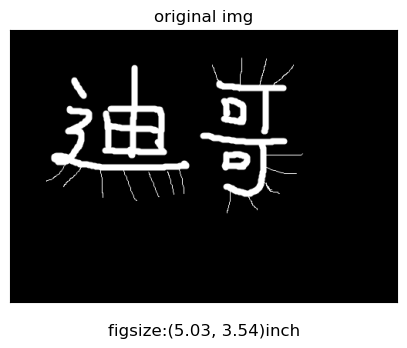

In [2]:
img = cv2.imread('assets/dige.png')
# cv_show('original img', img)
plt_show('original img', img)

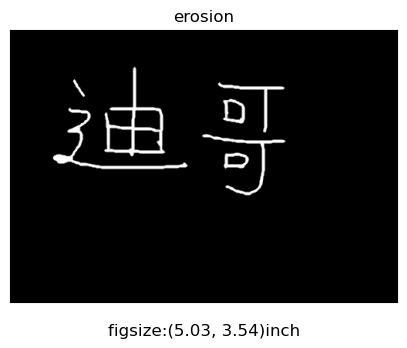

In [3]:
# 腐蚀操作
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
# cv_show('erosion', erosion)
plt_show('erosion', erosion)

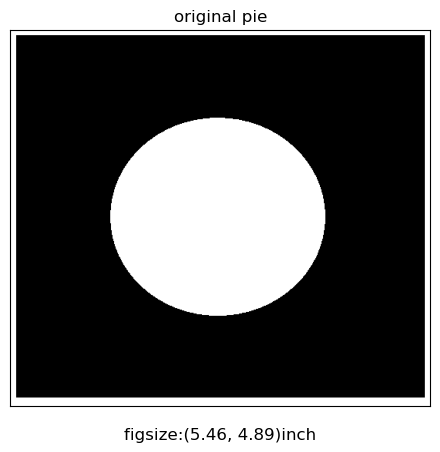

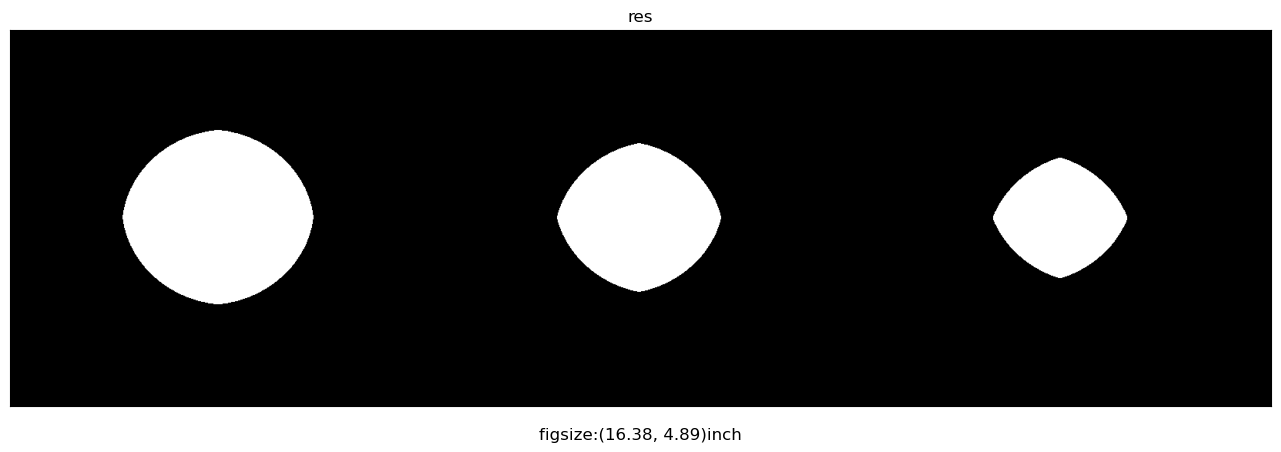

In [4]:
pie = cv2.imread('assets/pie.png')
# cv_show('original pie', pie)
plt_show('original pie', pie)
# 腐蚀操作
kernel = np.ones((30, 30), np.uint8)
erosion_1 = cv2.erode(pie, kernel, iterations=1)
erosion_2 = cv2.erode(pie, kernel, iterations=2)
erosion_3 = cv2.erode(pie, kernel, iterations=3)
res = np.hstack((erosion_1, erosion_2, erosion_3))
# cv_show('res', res)
plt_show('res', res)

### 膨胀操作：cv2.dilate()

cv2.dilate() 函数是 OpenCV 库中的一个函数，用于对图像进行膨胀操作。</br>膨胀是一种形态学操作，它通过使用一个结构元素（也称为核）来扩展图像中的前景对象（通常是白色区域）。</br>膨胀操作可以用来增加前景对象的大小，连接相邻的对象，或者填充前景对象中的小孔和断裂。

##### dst = cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

参数：</br>
- src：输入图像，可以是灰度图像或者二值图像。
- kernel：膨胀操作的核，可以是由 cv2.getStructuringElement() 生成的结构元素，或者直接定义的核数组。
- dst：输出图像，可以省略，如果不指定，函数会自动创建一个与 src 相同大小和类型的目标图像。
- anchor：锚点位置，默认值是 (-1, -1)，表示锚点位于核的中心。
- iterations：膨胀操作的迭代次数，默认值为 1。如果设置为更大的数值，膨胀操作会被重复执行多次。
- borderType：边界类型，用于处理边界扩展，默认值是 cv2.BORDER_CONSTANT。
- borderValue：当 borderType 为 cv2.BORDER_CONSTANT 时，用于填充边界像素的值。

膨胀操作的工作原理如下：</br>

1. 将核放置在输入图像的每个像素上。
2. 对于核覆盖的每个位置，检查核内的至少一个像素值是否是 1（对于二值图像）或者高于某个阈值（对于灰度图像）。
3. 如果核内至少有一个像素满足条件，则中心像素被设置为 1（对于二值图像）或者前景色（对于灰度图像）；否则，中心像素保持不变。

##### 示例

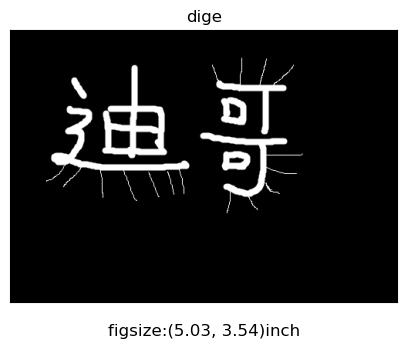

In [5]:
img = cv2.imread('assets/dige.png')
# cv_show('dige', img)
plt_show('dige', img)

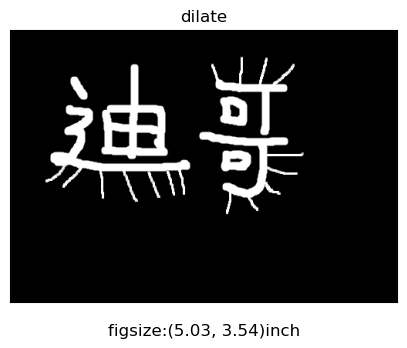

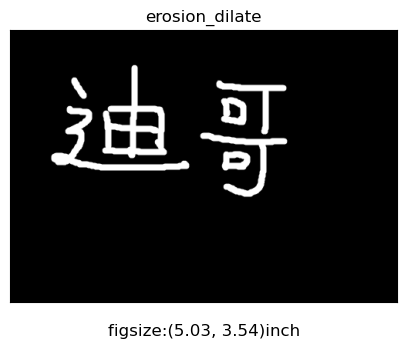

In [6]:
# 膨胀dilate操作
kernel = np.ones((3, 3), np.uint8)
dilate = cv2.dilate(img, kernel, iterations=1)
# cv_show('dilate', dilate)
plt_show('dilate', dilate)

''' 
腐蚀后，图像中的毛刺虽然消失了，但是整个字体也变细了
为了还原字体的粗度，腐蚀之后进行膨胀操作
'''
# 先腐蚀后膨胀
erosion = cv2.erode(img, kernel)
erosion_dilate = cv2.dilate(erosion, kernel)
# cv_show('erosion_dilate', erosion_dilate)
plt_show('erosion_dilate', erosion_dilate)

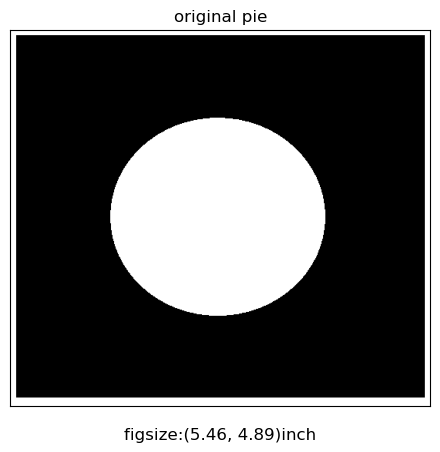

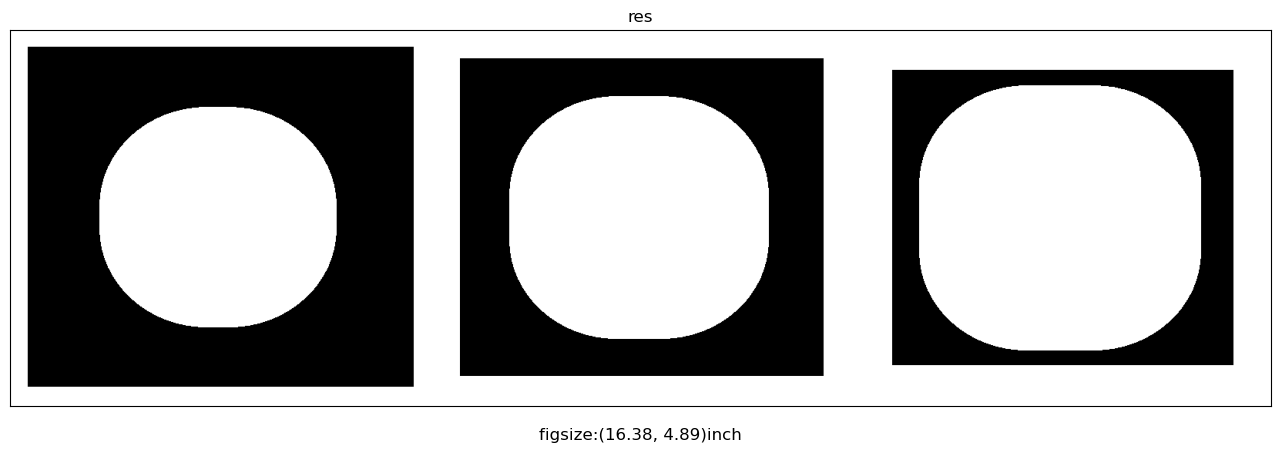

In [7]:
pie = cv2.imread('assets/pie.png')
# cv_show('original pie', pie)
plt_show('original pie', pie)

kernel = np.ones((30, 30), np.uint8)
dilate_1 = cv2.dilate(pie, kernel, iterations=1)
dilate_2 = cv2.dilate(pie, kernel, iterations=2)
dilate_3 = cv2.dilate(pie, kernel, iterations=3)
res = np.hstack((dilate_1, dilate_2, dilate_3))
# cv_show('res', res)
plt_show('res', res)


### 开运算与闭运算：cv2.morphologyEx()

cv2.morphologyEx() 函数是 OpenCV 库中的一个函数，用于对图像执行高级形态学变换。</br>形态学变换是基于图像形状的一系列操作，通常使用结构元素（也称为核）来修改图像中的前景和背景。

##### dst = cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

参数：</br>
- src：输入图像，通常是灰度图像或者二值图像。
- op：形态学操作的类型，可以是以下几种之一：
- - cv2.MORPH_ERODE：腐蚀操作。
- - cv2.MORPH_DILATE：膨胀操作。
- - cv2.MORPH_OPEN：开运算，先腐蚀后膨胀。
- - cv2.MORPH_CLOSE：闭运算，先膨胀后腐蚀。
- - cv2.MORPH_GRADIENT：形态学梯度，膨胀后的图像减去腐蚀后的图像。
- - cv2.MORPH_TOPHAT：顶帽运算，原图像减去开运算后的图像。
- - cv2.MORPH_BLACKHAT：黑帽运算，闭运算后的图像减去原图像。
- kernel：形态学操作的核，可以是由 cv2.getStructuringElement() 生成的结构元素，或者直接定义的核数组。
- dst：输出图像，可以省略，如果不指定，函数会自动创建一个与 src 相同大小和类型的目标图像。
- anchor：锚点位置，默认值是 (-1, -1)，表示锚点位于核的中心。
- iterations：形态学操作的迭代次数，默认值为 1。如果设置为更大的数值，操作会被重复执行多次。
- borderType：边界类型，用于处理边界扩展，默认值是 cv2.BORDER_CONSTANT。
- borderValue：当 borderType 为 cv2.BORDER_CONSTANT 时，用于填充边界像素的值。

##### 示例

开运算：先腐蚀，再膨胀

作用：
- 去除比结构元素小的噪声和细节。
- 平滑图像，增强边缘。
- 填充小空洞。

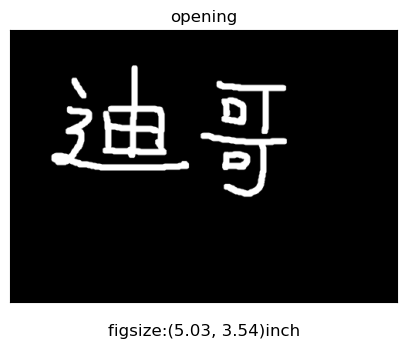

In [8]:
# 开：先腐蚀，再膨胀
img = cv2.imread('assets/dige.png')

kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# cv_show("opening", opening)
plt_show("opening", opening)

闭运算：先膨胀，后腐蚀

作用：
- 连接图像中的对象。
- 填充细小的空洞。
- 平滑图像，增强边界。

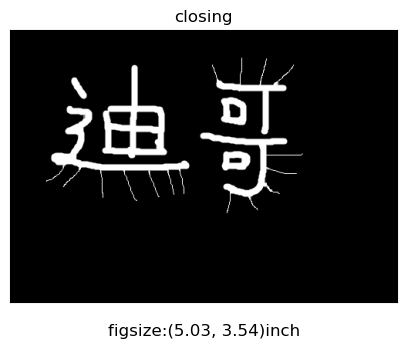

In [9]:
# 闭：先膨胀，再腐蚀
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# cv_show('closing', closing)
plt_show('closing', closing)

### 形态学中的梯度运算

形态学梯度运算是通过形态学膨胀（dilation）和腐蚀（erosion）操作来计算图像中的边缘。</br>形态学梯度运算可以突出显示图像中的边缘，因为它反映了图像中强度的快速变化。</br>

形态学梯度的定义是膨胀后的图像减去腐蚀后的图像（梯度=膨胀-腐蚀）。</br>具体来说，形态学梯度操作会增大前景对象的大小，同时保持其边缘清晰，这有助于检测图像中的边缘。

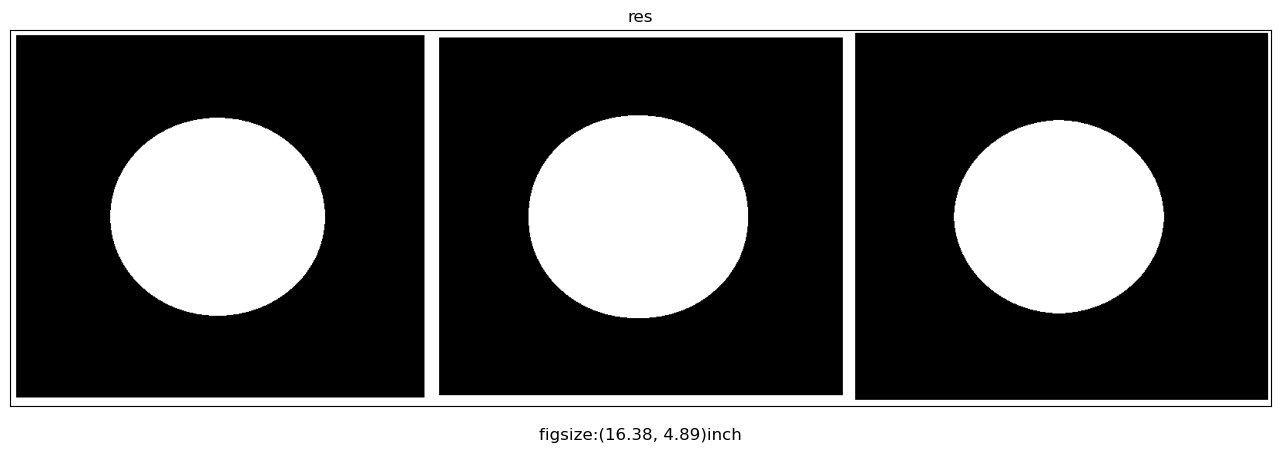

In [10]:
pie = cv2.imread('assets/pie.png')
kernel = np.ones((7, 7), np.uint8)
dilate = cv2.dilate(pie, kernel)
erosion = cv2.erode(pie, kernel)

res = np.hstack((pie, dilate, erosion))
# cv_show('res', res)
plt_show('res', res)

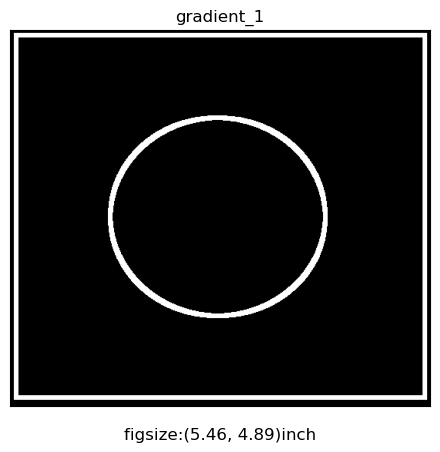

In [11]:
# 梯度 = 膨胀-腐蚀
gradient_1 = dilate - erosion
# cv_show('gradient_1', gradient_1)
plt_show('gradient_1', gradient_1)

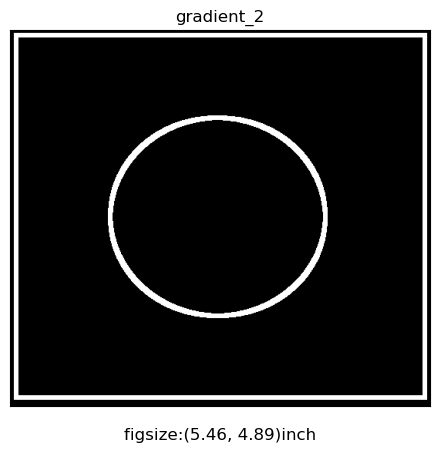

In [12]:
gradient_2 = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)
# cv_show('gradient_2', gradient_2)
plt_show('gradient_2', gradient_2)

### 礼帽与黑帽

- 礼帽 = 原始输入 - 开运算结果 = 原始输入 - 先腐蚀后膨胀
- 黑帽 = 闭运算结果 - 原始输入 = 先膨胀后腐蚀 - 原始输入

礼帽（Top Hat）操作可以用来突出显示图像中比周围区域亮的区域，或者说是原图像中被开运算“削掉”的部分</br>

礼帽操作常用于以下情况：

- 突出显示图像中的小而亮的目标。
- 在背景较暗而目标较亮的情况下，用于增强目标的对比度。

黑帽（Black Hat）操作可以用来突出显示图像中比周围区域暗的区域，或者说是原图像中被闭运算“填充”的部分</br>

黑帽操作常用于以下情况：

- 突出显示图像中的小而暗的目标。
- 在背景较亮而目标较暗的情况下，用于增强目标的对比度。

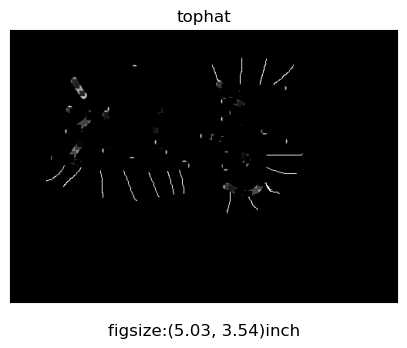

In [13]:
# 礼帽 = 原始输入 - 开运算
img = cv2.imread('assets/dige.png')
kernel = np.ones((7, 7), np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
# cv_show('tophat', tophat)
plt_show('tophat', tophat)

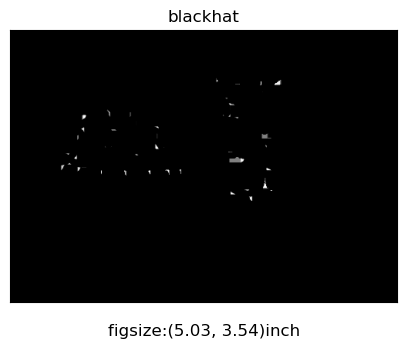

In [14]:
# 黑帽 = 闭运算 - 原始输入
img = cv2.imread('assets/dige.png')
kernel = np.ones((7, 7), np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
# cv_show('blackhat', blackhat)
plt_show('blackhat', blackhat)